In [1]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data

kdrama = pd.read_csv('kdrama.csv')

In [3]:
kdrama.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [4]:
kdrama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

In [5]:
# Change the data type of Rank, Duration, Aired Date, and Split Genre

kdrama['Rank'] = kdrama['Rank'].str.replace('#','').astype(int)

kdrama['Duration_In_Hours'] = kdrama['Duration'].str.replace('min.','').str.replace('hr.','').str.replace(' ','').astype(int)

# If Duration > 100 subtract 40 from Duration

kdrama['Duration_In_Hours'] = np.where(kdrama['Duration_In_Hours'] > 100, (kdrama['Duration_In_Hours'] - 40), kdrama['Duration_In_Hours'])

kdrama[['Start_Date','End_Date']] = kdrama['Aired Date'].str.split('-',expand=True)

kdrama['Start_Date'] = pd.to_datetime(kdrama['Start_Date'])
kdrama['End_Date'] = pd.to_datetime(kdrama['End_Date'])

kdrama['Genre'] = kdrama['Genre'].str.split(',')

C:\Users\commo\AppData\Local\Temp\ipykernel_5052\2950700890.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  kdrama['Duration_In_Hours'] = kdrama['Duration'].str.replace('min.','').str.replace('hr.','').str.replace(' ','').astype(int)


In [6]:
# Show the altered columns

kdrama[['Rank','Duration_In_Hours','Start_Date','End_Date','Genre']].head()

,Rank,Duration_In_Hours,Start_Date,End_Date,Genre
0,1,52,2021-05-14,NaT,"[Life, Drama, Family ]"
1,2,70,2020-07-29,2020-09-23,"[Thriller, Romance, Crime, Melodrama ]"
2,3,90,2020-03-12,2020-05-28,"[Friendship, Romance, Life, Medical ]"
3,4,100,2021-06-17,2021-09-16,"[Friendship, Romance, Life, Medical ]"
4,5,77,2018-03-21,2018-05-17,"[Psychological, Life, Drama, Family ]"


In [7]:
kdrama.dropna(inplace=True)
kdrama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 1 to 249
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  229 non-null    object        
 1   Aired Date            229 non-null    object        
 2   Year of release       229 non-null    int64         
 3   Original Network      229 non-null    object        
 4   Aired On              229 non-null    object        
 5   Number of Episodes    229 non-null    int64         
 6   Duration              229 non-null    object        
 7   Content Rating        229 non-null    object        
 8   Rating                229 non-null    float64       
 9   Synopsis              229 non-null    object        
 10  Genre                 229 non-null    object        
 11  Tags                  229 non-null    object        
 12  Director              229 non-null    object        
 13  Screenwriter        

In [8]:
kdrama.describe()

,Year of release,Number of Episodes,Rating,Rank,Duration_In_Hours
count,229.000000,229.000000,229.000000,229.000000,229.000000
mean,2018.148472,19.925764,8.532314,125.563319,51.100437
std,3.213835,13.465638,0.216236,71.840049,25.131818
min,2003.000000,4.000000,8.300000,2.000000,12.000000
25%,2017.000000,16.000000,8.300000,65.000000,20.000000
50%,2019.000000,16.000000,8.500000,124.000000,60.000000
75%,2021.000000,20.000000,8.700000,186.000000,70.000000
max,2022.000000,133.000000,9.100000,250.000000,100.000000


<Axes: xlabel='Rank', ylabel='Duration_In_Hours'>

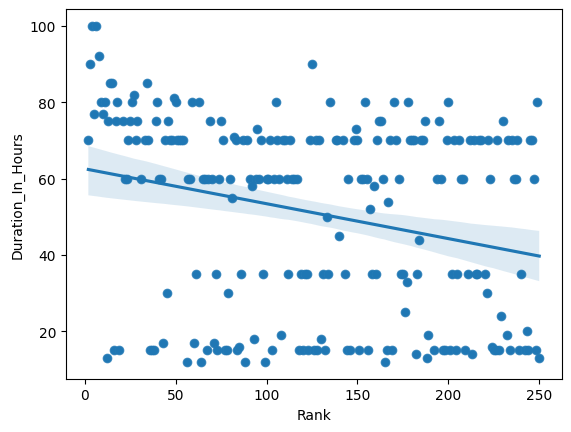

In [9]:
# Scatterplot of Rank vs Duration

sns.scatterplot(x='Rank',y='Duration_In_Hours',data=kdrama)

# Smooth the scatterplot with a line 

sns.regplot(x='Rank',y='Duration_In_Hours',data=kdrama)


# Ideas for a Write-Up / Analysis

1. What company produces the most top shows

2. When did the top shows release

3. What genre of shows were popular

4. Any recurring cast members

5. Any reccuring directors or screenwriters

6. When did people decide to watch the shows

In [10]:
# Split the Original Network column and One Hot Encode it for each network

kdrama['Original Network'] = kdrama['Original Network'].str.split(',')

kdrama_exploded = kdrama.explode('Original Network')

kdrama_exploded.head(1)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration_In_Hours,Start_Date,End_Date
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"[Thriller, Romance, Crime, Melodrama ]","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2,70,2020-07-29,2020-09-23


In [11]:
kdrama_exploded['Original Network'] = kdrama_exploded['Original Network'].str.strip()

<Axes: ylabel='Original Network'>

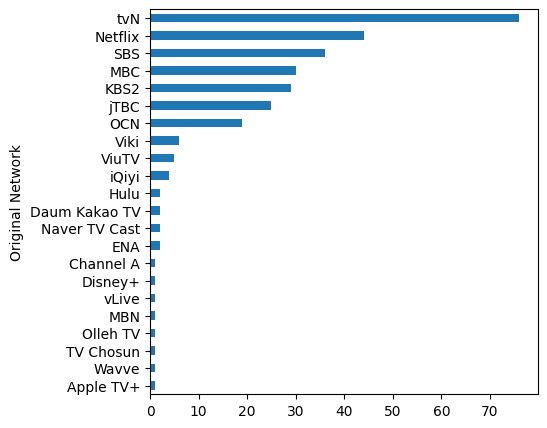

In [12]:
plt.figure(figsize=(5,5))
kdrama_exploded.groupby('Original Network')['Rank'].count().sort_values(ascending=True).plot(kind='barh')

<Axes: >

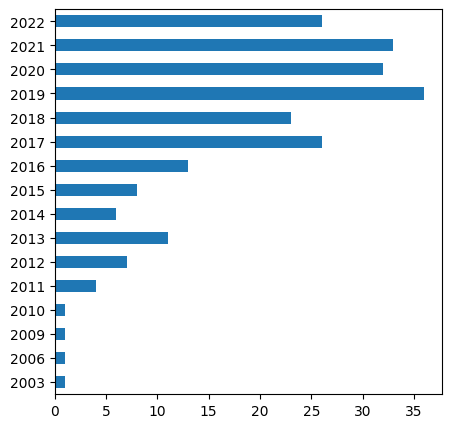

In [13]:
plt.figure(figsize=(5,5))
kdrama['Year of release'].value_counts().sort_index(ascending=True).plot(kind='barh')